In [86]:
import tensorflow as tf
import pandas as pd
mlb = pd.read_csv('dataset/major_full.csv')

In [87]:
mlb_test = pd.read_csv('dataset/test.csv')

In [88]:
mlb_test

,TEAM,2021PAYROLL,BA,ERA,OPS
0,Dbacks,92556955,0.230,5.37,0.674
1,Braves,144340546,0.240,4.21,0.750
2,Orioles,58132982,0.237,5.62,0.695
3,Red Sox,178056241,0.257,4.05,0.758
4,Cubs,153722288,0.227,4.07,0.702
5,White Sox,134477707,0.257,3.59,0.760
6,Reds,123831289,0.247,4.44,0.743
7,Indians,52808087,0.230,4.40,0.697
8,Rockies,116077231,0.244,4.71,0.703
9,Tigers,86517740,0.235,4.68,0.692


In [89]:
mlb

,TEAM,PAYROLL,AVG,ERA,OPS,RANK
0,20Dodgers,"108,417,397",0.256,3.11,0.821,1
1,20Rays,"28,290,689",0.231,3.67,0.753,2
2,20Padres,"73,097,954",0.255,4.09,0.798,3
3,20Twins,"55,679,689",0.238,3.52,0.743,4
4,20Athletics,"36,720,178",0.227,3.99,0.718,5
...,...,...,...,...,...,...
85,18Cardinals,"161,005,146",0.249,3.85,0.730,13
86,18Rays,"78,231,049",0.258,3.74,0.740,10
87,18Rangers,"144,498,078",0.240,4.92,0.722,23
88,18Jays,"162,664,502",0.244,4.85,0.739,22


In [90]:
for i in range(len(mlb)):
    mlb['PAYROLL'][i]=mlb['PAYROLL'][i].replace(',',"")


<ipython-input-90-e472b4f66b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlb['PAYROLL'][i]=mlb['PAYROLL'][i].replace(',',"")


In [91]:
mlb['PAYROLL']

0     108417397
1      28290689
2      73097954
3      55679689
4      36720178
        ...    
85    161005146
86     78231049
87    144498078
88    162664502
89    181586759
Name: PAYROLL, Length: 90, dtype: object

In [92]:
mlb['PAYROLL']=pd.to_numeric(mlb['PAYROLL'])

In [93]:
mlb_test['2021PAYROLL']=pd.to_numeric(mlb_test['2021PAYROLL'])

In [94]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     90 non-null     object 
 1   PAYROLL  90 non-null     int64  
 2   AVG      90 non-null     float64
 3   ERA      90 non-null     float64
 4   OPS      90 non-null     float64
 5   RANK     90 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ KB


In [95]:
mlb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEAM         30 non-null     object 
 1   2021PAYROLL  30 non-null     int64  
 2   BA           30 non-null     float64
 3   ERA          30 non-null     float64
 4   OPS          30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [96]:
display(mlb.describe())

,PAYROLL,AVG,ERA,OPS,RANK
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000
mean,1.125018e+08,0.248011,4.371444,0.740989,15.500000
std,5.260002e+07,0.013137,0.601266,0.043822,8.703932
min,2.347864e+07,0.209000,3.110000,0.641000,1.000000
25%,7.282309e+07,0.240000,3.882500,0.707750,8.000000
50%,1.062334e+08,0.249000,4.285000,0.740500,15.500000
75%,1.539585e+08,0.257000,4.845000,0.769750,23.000000
max,2.356494e+08,0.274000,5.630000,0.848000,30.000000


In [97]:
import numpy as np

In [98]:
mlb.index = mlb['TEAM']
mlb_test.index = mlb_test['TEAM']

In [99]:
mlb_data=mlb.drop('TEAM',axis=1)
mlb_data

,PAYROLL,AVG,ERA,OPS,RANK
TEAM,,,,,
20Dodgers,108417397,0.256,3.11,0.821,1
20Rays,28290689,0.231,3.67,0.753,2
20Padres,73097954,0.255,4.09,0.798,3
20Twins,55679689,0.238,3.52,0.743,4
20Athletics,36720178,0.227,3.99,0.718,5
...,...,...,...,...,...
18Cardinals,161005146,0.249,3.85,0.730,13
18Rays,78231049,0.258,3.74,0.740,10
18Rangers,144498078,0.240,4.92,0.722,23


In [100]:
mlb_test_data = mlb_test.drop('TEAM',axis=1)

In [101]:
print(mlb_data)
print(mlb_test_data)

               PAYROLL    AVG   ERA    OPS  RANK
TEAM                                            
20Dodgers    108417397  0.256  3.11  0.821     1
20Rays        28290689  0.231  3.67  0.753     2
20Padres      73097954  0.255  4.09  0.798     3
20Twins       55679689  0.238  3.52  0.743     4
20Athletics   36720178  0.227  3.99  0.718     5
...                ...    ...   ...    ...   ...
18Cardinals  161005146  0.249  3.85  0.730    13
18Rays        78231049  0.258  3.74  0.740    10
18Rangers    144498078  0.240  4.92  0.722    23
18Jays       162664502  0.244  4.85  0.739    22
18Nationals  181586759  0.254  4.04  0.753    16

[90 rows x 5 columns]
           2021PAYROLL     BA   ERA    OPS
TEAM                                      
Dbacks        92556955  0.230  5.37  0.674
Braves       144340546  0.240  4.21  0.750
Orioles       58132982  0.237  5.62  0.695
Red Sox      178056241  0.257  4.05  0.758
Cubs         153722288  0.227  4.07  0.702
White Sox    134477707  0.257  3.59  0.

In [102]:
mlb_shuffle = mlb_data.sample(frac = 1)

In [103]:
mlb_np = mlb_shuffle.to_numpy()

In [104]:
mlb_test_np = mlb_test_data.to_numpy()

In [105]:
test_2021 = mlb_test_np[:,:]

In [106]:
test_2021.shape

(30, 4)

In [107]:
train_ratio = 1
input_cnt = 4
output_cnt = 1

train_idx = int(len(mlb_np)*train_ratio)
print("train_idx : ",train_idx)
print("test_idx : ", len(mlb_np)-train_idx)

train_idx :  90
test_idx :  0


In [108]:
train_X,train_Y = mlb_np[:train_idx,:-output_cnt],mlb_np[:train_idx,-output_cnt:]


In [109]:
print(train_X.shape)
print(train_Y.shape)


(90, 4)
(90, 1)


In [110]:
train_x_mean = np.mean(train_X, axis = 0)
train_x_std  = train_X.std(axis = 0)

In [111]:
train_X -= train_x_mean
train_X /= train_x_std

In [112]:
test_2021 -= train_x_mean
test_2021 /= train_x_std

In [113]:
df_test_2021 = pd.DataFrame(test_2021)
df_test_2021.describe()

,0,1,2,3
count,30.000000,30.000000,30.000000,30.000000
mean,0.322926,-0.569865,-0.293427,-0.503064
std,1.004997,0.932059,1.090565,0.791289
min,-1.141219,-2.220774,-2.076286,-1.537240
25%,-0.467897,-1.340459,-1.286041,-1.106971
50%,0.257204,-0.766341,-0.253287,-0.699649
75%,1.165662,-0.096537,0.449153,0.183836
max,2.635084,1.453582,2.088179,0.895215


In [114]:
import tensorflow as tf
LAYER_MODEL = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units=4, 
                                                          activation='elu', 
                                                          input_shape = (4,)),
                                    tf.keras.layers.Dense(units=12,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units=24,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units=1)       
])

In [115]:
LAYER_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss = 'mse') #분류였을떄는 crossentropy 썼음

In [ ]:
history_2 = LAYER_MODEL.fit(train_X,train_Y,epochs=200,batch_size=3)

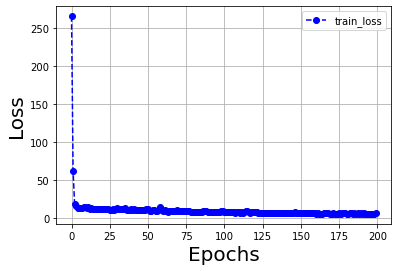

In [119]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss'],'--o',color='blue',label='train_loss')
#plt.plot(history_2.history['val_loss'],'--s',color='green',label='val_loss') val 값 없음

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [120]:
pred_2021 = LAYER_MODEL.predict(test_2021)

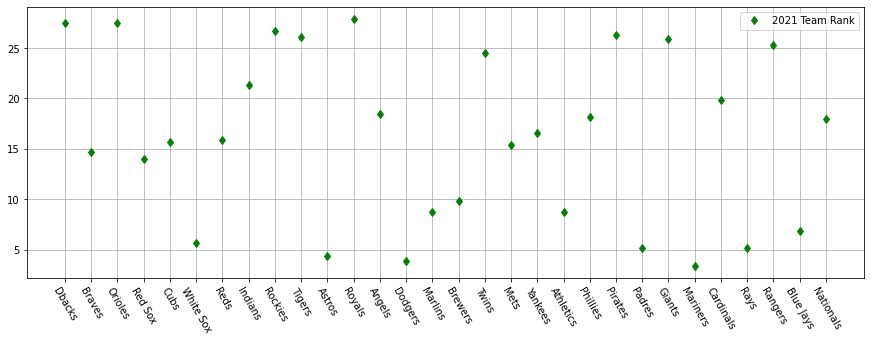

In [121]:
plt.figure(figsize = (15, 5))
plt.plot(mlb_test.index, pred_2021[:],'d',color='green',label='2021 Team Rank')
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.xticks(rotation = 300)
plt.legend()
plt.grid()
plt.show()

In [ ]:
history_1 = NEW_MODEL.fit(train_X,train_Y,epochs=300,batch_size=3)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['loss'],'--o',color='red',label='train_loss')
#plt.plot(history_2.history['val_loss'],'--s',color='green',label='val_loss') val 값 없음

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_2021 = NEW_MODEL.predict(test_2021)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(mlb_test.index, pred_2021[:],'d',color='green',label='2021 Team Rank')
plt.rc('axes', labelsize=20)
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

In [ ]:
### 

In [60]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [83]:
n = 10
p = 0.5
x = 3
st.binom.pmf(x,n,p)

0.11718750000000014

In [68]:
st.binom.cdf(5,n,p)

0.6230468749999999

In [85]:
0.5**7*0.125*120

0.1171875

In [75]:
# 구간의 확률.
# P(3 <= x <=7)
st.binom.cdf(7,n,p)-st.binom.cdf(2,n,p)   

0.890625

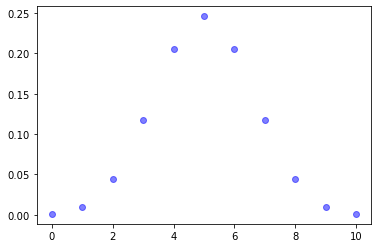

In [80]:
n = 10
p = 0.5
x = np.arange(0,11)
y = st.binom.pmf(x,n,p)
plt.scatter(x,y,color='blue', alpha=0.5)
plt.show()